# What turnout tells us?
> Exploratory data anaylsis with vote and demographic data

- toc: true 
- badges: false
- comments: true
- categories: [jupyter]
- image: images/margin_turnout.png

# Turnout

"The candidate who can let more supporters go to vote wins the election." is a popular comment on Taiwanese elections. Does turnout really play an important role when deciding who wins the election? It's a big question. At least, I can start with examining whether turnouts look very different across elections in the same districts.

In this article, `turnout` is defined as: `total votes / voters`. Both valid votes and invalid votes are included in total votes.

## Margin v. Turnout

In most Taiwanese elections, two major parties, KMT and DPP, compete for the office. Calculating the two-party `margin` by `DPP share(%) - KMT share(%)` in a electoral district can help us explore where each party's supporter are at. Combining margin with turnout veifies whether supporters of different parties show different voting behaviors.

### The data

Every record in the data is the voting statistics of a election in a village. The data contains mayoral and presidential elections from 2008 to 2020. In general, every village has seven election results if it didn't experience any electoral district combination or change. Some demographic statistics such as college degree holder percentage, married percentage and age composition are also connected to the vote data.

### Margin PR group

Let all villages order by margin value from low to high and seperate them into ten groups. The first group with the 10% lowest margin value is group PR 0-10. The villages in this group tend to vote for KMT while villages in the last group tend to vote for DPP. Averaging the turnout within each PR group is as the plot below:

In [13]:
# hide
library("tidyverse")
library("gridExtra")

margin_pr = readr::read_csv("margin_pr_turnout.csv", col_types = cols(year = col_factor()))
margin_records = readr::read_csv("margin_records.csv")
edu_pr = readr::read_csv("edu_pr_turnout.csv", col_types = cols(year = col_factor()))
edu_records = readr::read_csv("edu_records.csv")

color_gradient <- c("#f981df", "#f867d4", "#f747c8", "#f606ba", 
                    "#c41a9a", "#961d7a", "#6b1b5a", "#43153b")

Parsed with column specification:
cols(
  villID = col_character(),
  mayoral = col_double(),
  presidential = col_double(),
  margin_pr = col_double()
)

Parsed with column specification:
cols(
  villID = col_character(),
  mayoral = col_double(),
  presidential = col_double(),
  univ_pr = col_double()
)



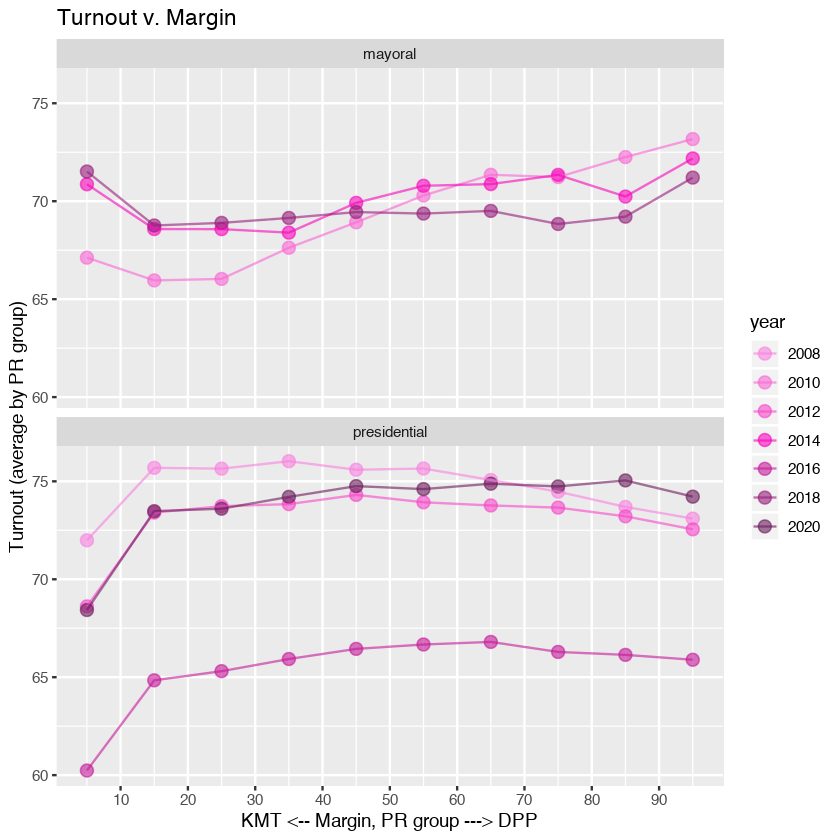

In [6]:
# collapse-hide
ggplot(margin_pr, aes(x = margin_pr_interval_by_year, y = avg_turnout, color = year)) +
  geom_point(size = 3, alpha = 0.6) +
  geom_line(aes(group = year), alpha = 0.6) +
  scale_color_manual(values = color_gradient) +
  scale_x_continuous(breaks = seq(0, 100, 10)) +
  labs(title = "Turnout v. Margin",
       x = "KMT <-- Margin, PR group ---> DPP",
       y = "Turnout(%), average by PR group)") +
  facet_wrap(~election, nrow = 2)

The most KMT-inclined villages have a higher turnout in mayoral elections but very low turnout in presidential elections. KMT won presidential elections in 2008 and 2012. However, no matter the polls showed KMT would win the election or not, their supporters don't like to vote in presidential elections as their voting tendency in mayoral elections. The most DPP-inclined villages does not show a clear pattern in whether to vote.

### Zoom in: the most KMT-inclined and DPP-inclined villages

The turnout difference between presidential and mayoral elections can be show as below. Each point is a village in a specific PR group. The orange line is a diagonal line. Any point on this line means it has the same turnout in both type elections.

Warning message:
“Removed 12 rows containing missing values (geom_point).”
Warning message:
“Removed 1 rows containing missing values (geom_point).”


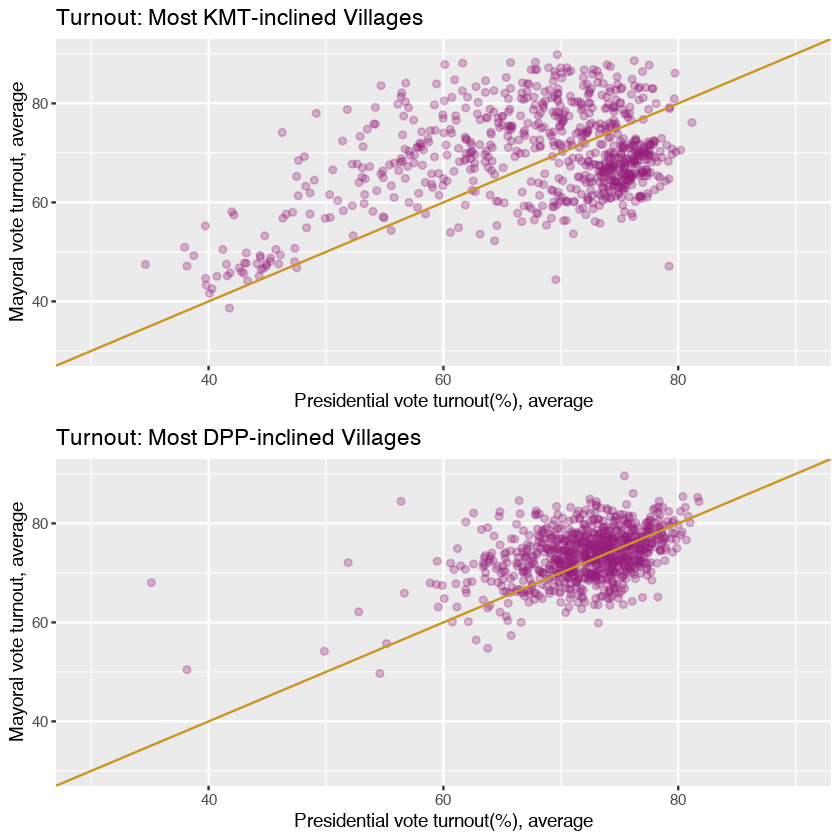

In [19]:
# collapse-hide
mayoral_presidential_turnout_KMT <- margin_records %>%
  filter(margin_pr < 10) %>% 
  ggplot() +
  geom_point(aes(x = presidential, y = mayoral), alpha = 0.3, color = "#961d7a") +
  geom_abline(intercept = 0, slope = 1, color = "#CC9423") +
  xlim(c(30, 90)) +
  ylim(c(30, 90)) +
  labs(title = "Turnout: Most KMT-inclined Villages",
       x = "Presidential vote turnout(%), average",
       y = "Mayoral vote turnout, average")

mayoral_presidential_turnout_DPP <- margin_records %>%
  filter(margin_pr >= 90) %>% 
  drop_na() %>%
  ggplot() +
  geom_point(aes(x = presidential, y = mayoral), alpha = 0.3, color = "#961d7a") +
  geom_abline(intercept = 0, slope = 1, color = "#CC9423") +
  xlim(c(30, 90)) +
  ylim(c(30, 90)) +
  labs(title = "Turnout: Most DPP-inclined Villages",
       x = "Presidential vote turnout(%), average",
       y = "Mayoral vote turnout, average")

grid.arrange(mayoral_presidential_turnout_KMT, 
             mayoral_presidential_turnout_DPP, nrow=2)

Some KMT-inclined villages have turnout at 40-60% in presidential elections while have higher turnouts in mayoral elections. The turnouts within the most KMT group vary on a wide range of 35-80%. In contrast, the most DPP-inclined villages lie between the diagonal line roughly equally and concentrate on the range of 60-80%.

## College Degree v. Turnout

### College degree holder PR group

Under the similiar logic, I separate the villages into ten group by its percentage of college degree holder citizens. The average turnout of each PR group in the seven elections is as follows:

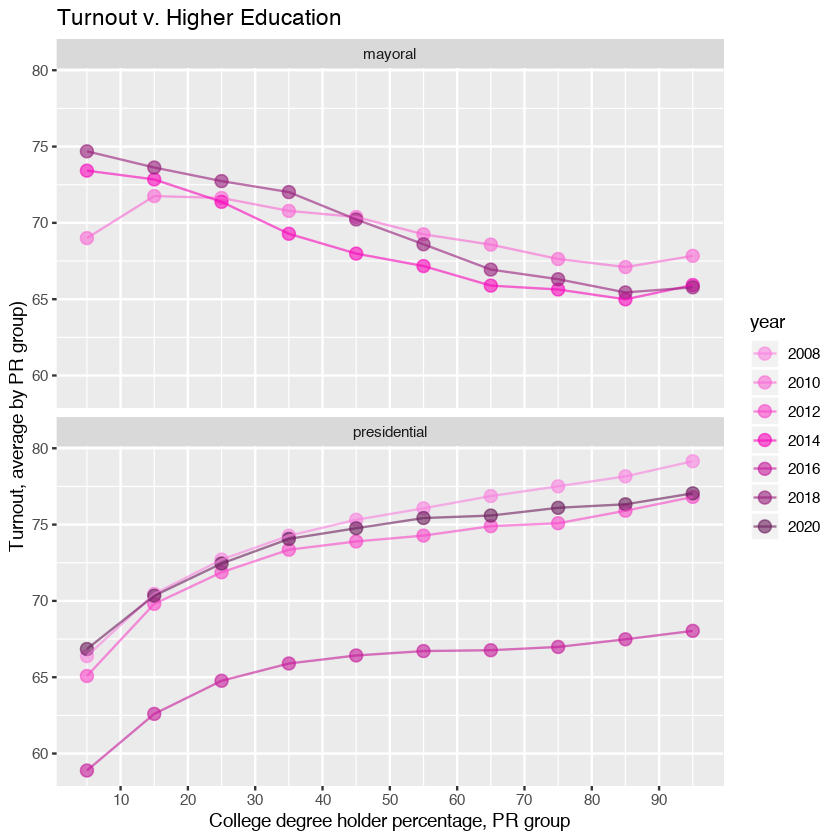

In [9]:
# collapse-hide
ggplot(edu_pr, aes(x = univ_pr_interval_by_year, y = avg_turnout, color = year)) +
  geom_point(size = 3, alpha = 0.6) +
  geom_line(aes(group = year), alpha = 0.6) +
  scale_color_manual(values = color_gradient) +
  scale_x_continuous(breaks = seq(0, 100, 10)) +
  labs(title = "Turnout v. Higher Education",
       x = "College degree holder percentage, PR group",
       y = "Turnout(%), average by PR group)") +
  facet_wrap(~election, nrow = 2)

Interestingly, the two end of education PR group shows opposite voting behaviors. The bottom 10% tend to vote in mayoral elections but not in presidential elections while the top 10% like to vote in presidential elections.

### Zoom in: the top and bottom 10% college % group

The most villages with the least % of college degree holders have turnout at more than 60%. The points spread wide. Contrastly, almost all villages in top 10% group are on the left bottom side of the plot and gather in a small range of 70-80% in presidential elections and 60-70% in mayoral elections.

Warning message:
“Removed 7 rows containing missing values (geom_point).”


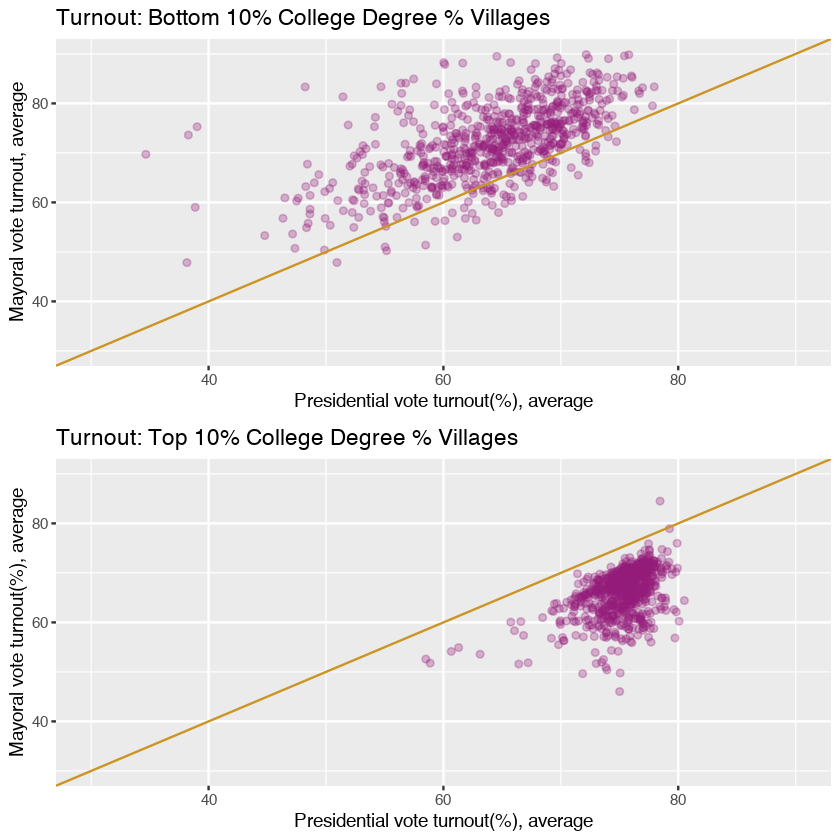

In [20]:
# collapse-hide
mayoral_presidential_turnout_low_edu <- edu_records %>%
  filter(univ_pr < 10) %>% 
  drop_na() %>%
  ggplot() +
  geom_point(aes(x = presidential, y = mayoral), alpha = 0.3, color = "#961d7a") +
  geom_abline(intercept = 0, slope = 1, color = "#CC9423") +
  xlim(c(30, 90)) +
  ylim(c(30, 90)) +
  labs(title = "Turnout: Bottom 10% College Degree % Villages",
       x = "Presidential vote turnout(%), average",
       y = "Mayoral vote turnout, average")

mayoral_presidential_turnout_high_edu <- edu_records %>%
  filter(univ_pr >= 90) %>% 
  drop_na() %>%
  ggplot() +
  geom_point(aes(x = presidential, y = mayoral), alpha = 0.3, color = "#961d7a") +
  geom_abline(intercept = 0, slope = 1, color = "#CC9423") +
  xlim(c(30, 90)) +
  ylim(c(30, 90)) +
  labs(title = "Turnout: Top 10% College Degree % Villages",
       x = "Presidential vote turnout(%), average",
       y = "Mayoral vote turnout(%), average")

grid.arrange(mayoral_presidential_turnout_low_edu, 
             mayoral_presidential_turnout_high_edu, nrow=2)

It's not clear why these villages have such a different voting behavior in mayoral and presidential elections based on the current evidence. It can be an initiative of following study.